## Задание №1

Загрузите датасет titanic.csv и найдите ответы на вопросы.

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('titanic.csv', index_col = 0)
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Описание признаков данных:

Survived - спасение (0 = нет, 1 = да)

Pclass - класс билета (1 = 1st, 2 = 2nd, 3 = 3rd)

Name - имя

Sex - пол

Age - возраст

SibSp - количество братьев/сестер/супругов пассажира на борту

Parch - количество детей/родителей пассажира на борту

Ticket - номер билета

Fare - стоимость билета

Cabin - номер каюты

Embarked - порт посадки

1) Какое количество мужчин и женщин ехало на корабле?

In [4]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Ответ: 314 женщин, 577 мужчин.

2) Какой части пассажиров удалось выжить? Ответ приведите в процентах.

In [5]:
Passangers = data['Survived']
Passangers_who_can_survived = Passangers[Passangers == 1]
print('%f %%' % (Passangers_who_can_survived.count() / Passangers.count() * 100))

38.383838 %


Ответ: 38.383838 %

3) Какую долю пассажиры первого класса составляли среди всех пассажиров? Ответ приведите в процентах.

In [6]:
Passangers = data['Pclass']
Passangers_who_swum_1st_class = Passangers[Passangers == 1]
print('%f %%' % (Passangers_who_swum_1st_class.count() / Passangers.count() * 100))

24.242424 %


Ответ: 24.242424 %

4) Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.

In [8]:
print('Median %d, average age %d' % (round(data['Age'].median()) , round(data['Age'].mean())))

Median 28, average age 30


Ответ:Median 28, average age 30.

5) Постройте гистограмму возрастов пассажиров.

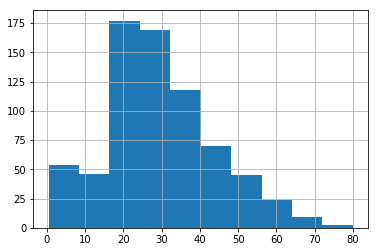

In [20]:
%matplotlib inline
data['Age'].hist()

6) Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch

In [21]:
data[['SibSp','Parch']].corr(method='pearson')

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


Ответ: 0.414838. Эти два признака не коррелируют.

7) Какое самое популярное женское имя на корабле?

In [22]:
names = data[data['Sex'] == 'female']['Name'].str.extract('^.+, (?:(?:Lady)|(?:Mrs)|(?:Miss))\. (.+)$', expand=False).str.replace('\(|\)|\"', '').str.split(' ') 
names_dict = {}
for names_list in names:
    if isinstance(names_list, float) : continue 
    for name in names_list:
        names_dict[name] = names_dict.get(name,0) + 1
print(max(names_dict.items(), key=lambda x: x[1]))

('Mary', 20)


Ответ:The most popular name in the ship is Mary.